<a href="https://colab.research.google.com/github/VNIT-07/python/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

In [5]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test-mean)/(std)

In [7]:
model = keras.Sequential([
    layers.Dense(1, input_shape=(x_train.shape[1],), activation='linear')  # Single neuron for regression
])

print(model)

<Sequential name=sequential_1, built=True>


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 570.1429 - mae: 22.2219 - val_loss: 560.8929 - val_mae: 22.4696
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 537.6415 - mae: 21.7847 - val_loss: 528.4993 - val_mae: 21.8928
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 494.7766 - mae: 21.0965 - val_loss: 500.2804 - val_mae: 21.3378
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 476.0967 - mae: 20.7184 - val_loss: 474.1698 - val_mae: 20.8061
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 483.0901 - mae: 20.7708 - val_loss: 448.8561 - val_mae: 20.2661
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 403.7691 - mae: 19.2734 - val_loss: 426.0320 - val_mae: 19.7519
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 408.6229 - mae: 19.3158 - val_loss: 404.6302 - val_mae: 19.2507
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 404.2812 - mae: 18.9929 - val_loss: 383.6434 - val_mae: 18.7454
Epoch 9/100
51/5

In [12]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.8904 - mae: 3.3255
Test Loss (MSE): 22.8106, Test MAE: 3.4341


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


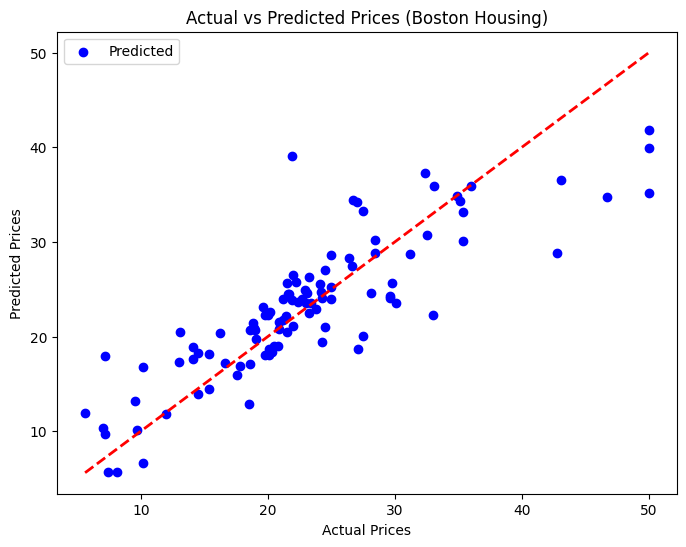

In [13]:
predictions = model.predict(x_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Boston Housing)")
plt.legend()
plt.show()

# New Section